# New Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/food_adulteration_data.csv')
df


,adulteration_id,product_name,brand,category,adulterant,detection_date,detection_method,severity,health_risk,action_taken
0,1,Butter,BrandB,Meat,Artificial sweeteners,5/11/2024,Microbiological Analysis,Moderate,Low,Product Recall
1,2,Chicken,BrandC,Dairy,Coloring agents,5/23/2024,Sensory Evaluation,Severe,Medium,Warning Issued
2,3,Yogurt,BrandC,Meat,Artificial sweeteners,2/17/2024,Sensory Evaluation,Severe,High,Investigation Launched
3,4,Wine,BrandB,Beverages,Coloring agents,5/16/2024,Spectroscopy,Minor,Medium,Product Recall
4,5,Bread,BrandD,Dairy,Water,6/6/2024,Chemical Analysis,Severe,Medium,Warning Issued
...,...,...,...,...,...,...,...,...,...,...
995,996,Butter,BrandD,Beverages,Artificial sweeteners,6/13/2024,Chemical Analysis,Minor,Medium,Fine Imposed
996,997,Beef,BrandD,Beverages,Melamine,5/26/2024,Microbiological Analysis,Minor,Medium,Warning Issued
997,998,Bread,BrandD,Dairy,Chalk,3/25/2024,Microbiological Analysis,Moderate,High,Fine Imposed
998,999,Juice,BrandE,Beverages,Chalk,3/2/2024,Spectroscopy,Minor,High,Product Recall


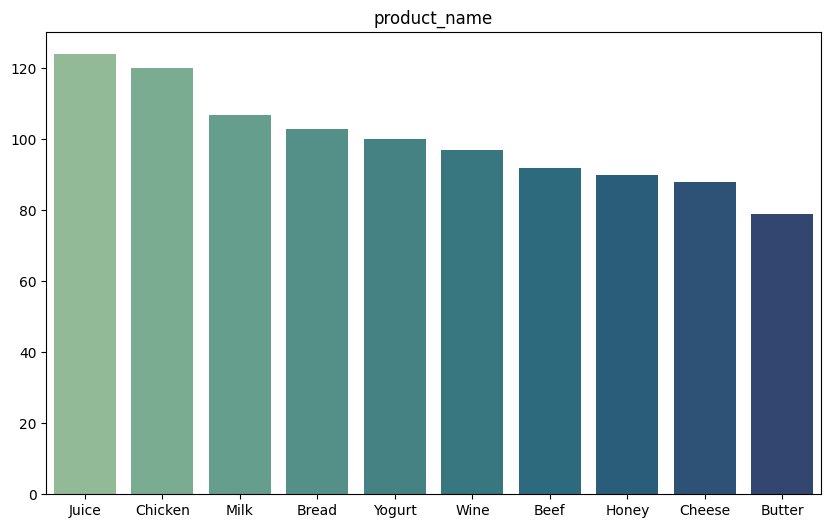

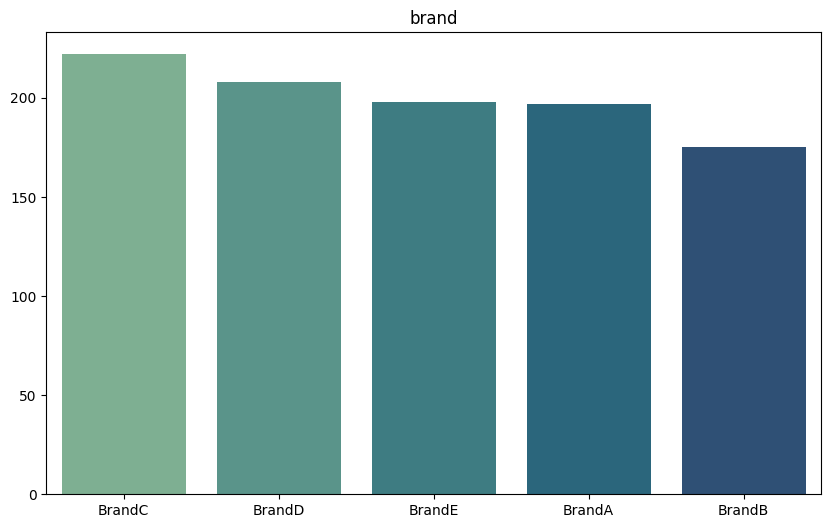

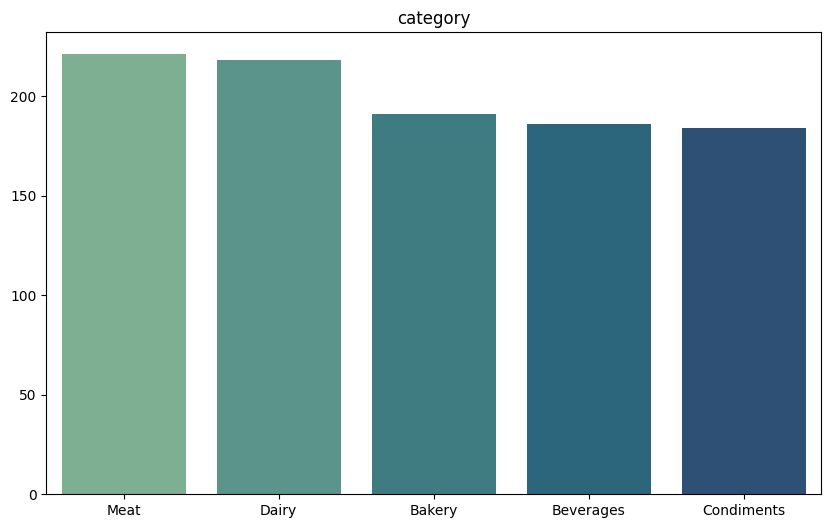

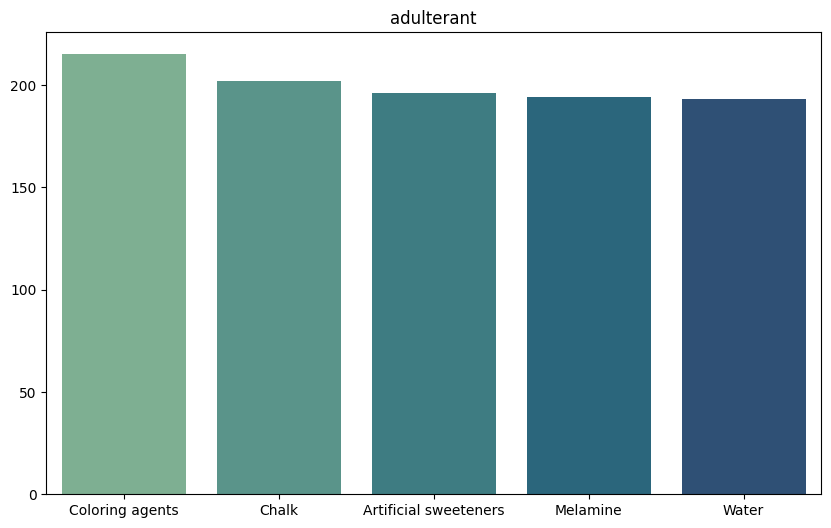

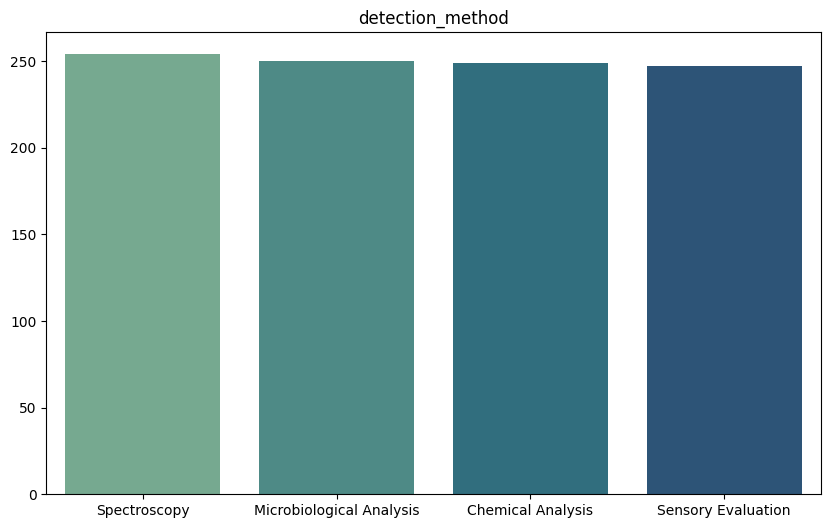

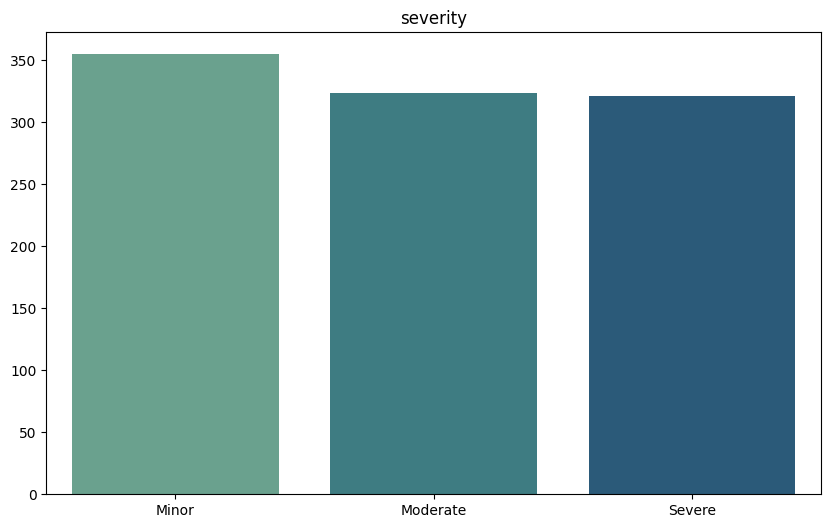

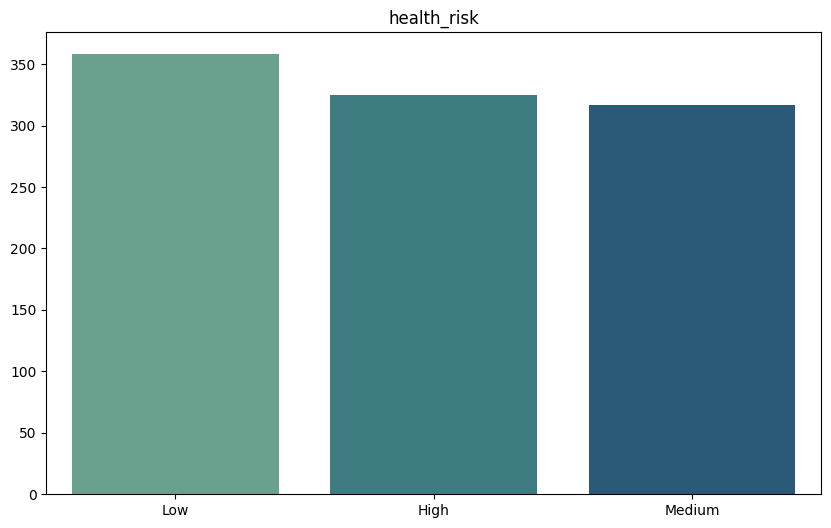

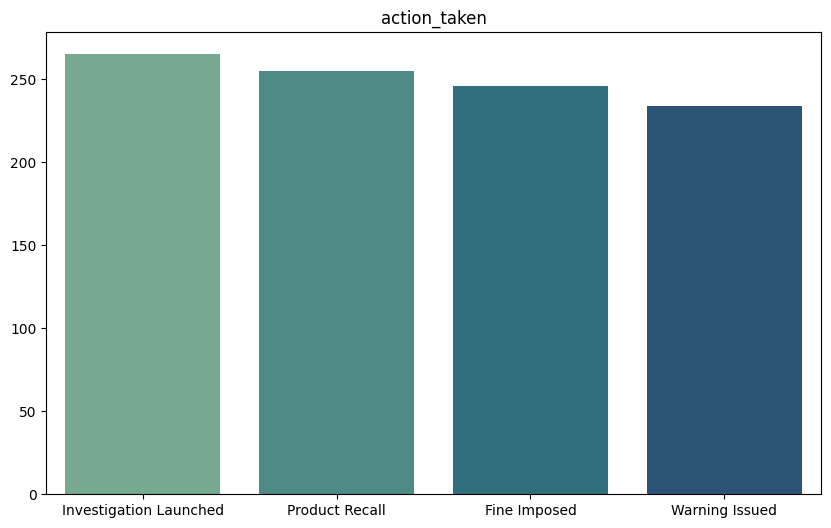

In [ ]:
df.drop(columns=['adulteration_id', 'detection_date'], inplace=True)

for col in df.columns:
    data = df[col].value_counts().reset_index()
    plt.figure(figsize=(10,6))
    plt.title(col)
    sns.barplot(data=data, x=col, y='count', palette='crest')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [ ]:
def my_heatmap(title, data):
    plt.figure(figsize=(10,8))
    plt.title(title)
    sns.heatmap(data=data, annot=True, cmap='coolwarm')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(rotation=0)
    plt.show()

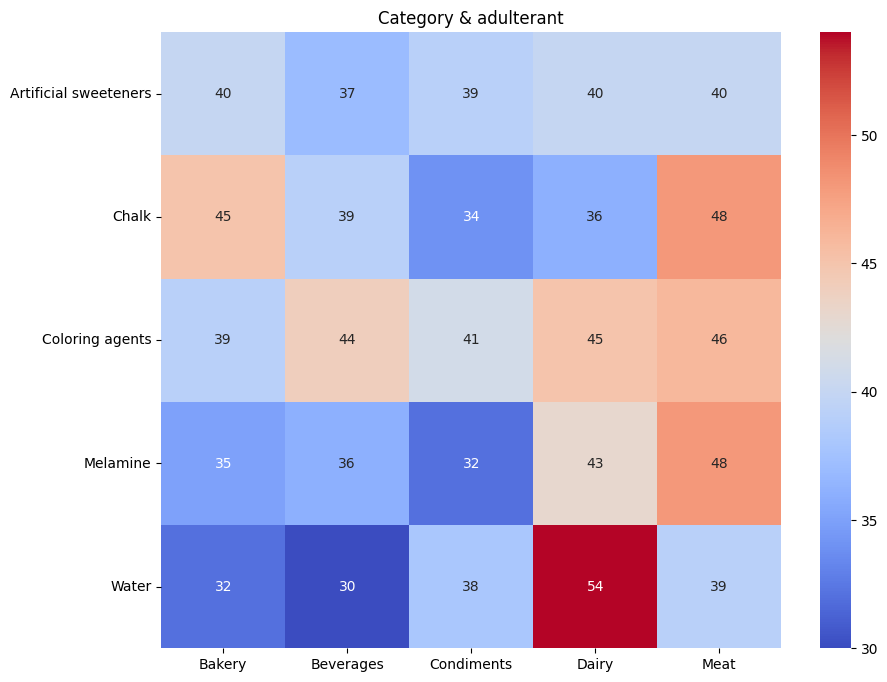

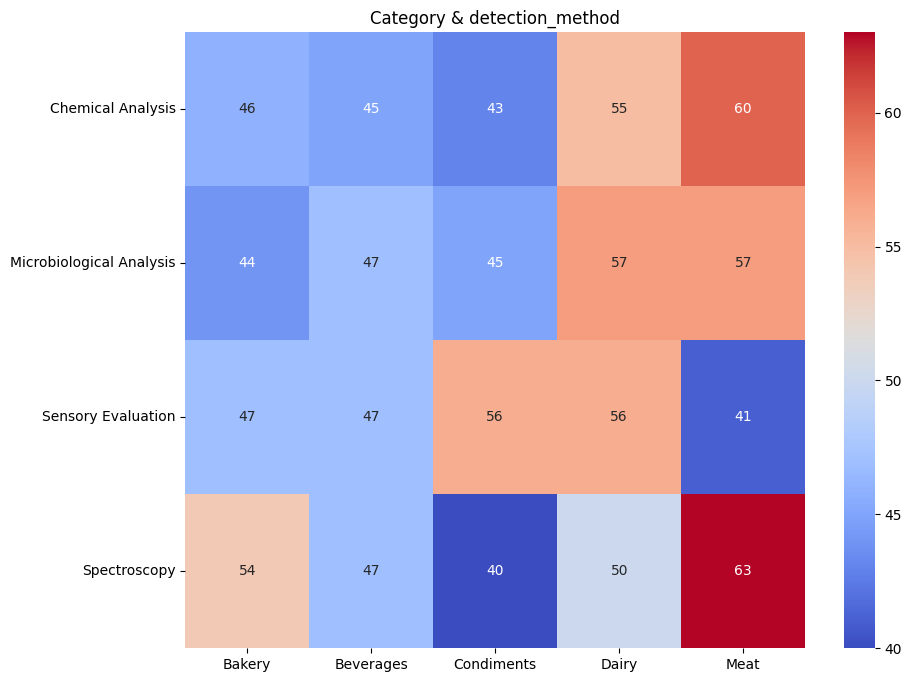

In [ ]:
for col in ['adulterant', 'detection_method']:
    data = pd.crosstab(df[col], df['category'])
    my_heatmap(f'Category & {col}', data)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats


In [ ]:
#dataset is separated by tab, so we use seperator='\t'
df = pd.read_csv('/content/food_adulteration_data.csv',sep=',', encoding='latin-1')

In [ ]:
df.head()


,adulteration_id,product_name,brand,category,adulterant,detection_date,detection_method,severity,health_risk,action_taken
0,1,Butter,BrandB,Meat,Artificial sweeteners,5/11/2024,Microbiological Analysis,Moderate,Low,Product Recall
1,2,Chicken,BrandC,Dairy,Coloring agents,5/23/2024,Sensory Evaluation,Severe,Medium,Warning Issued
2,3,Yogurt,BrandC,Meat,Artificial sweeteners,2/17/2024,Sensory Evaluation,Severe,High,Investigation Launched
3,4,Wine,BrandB,Beverages,Coloring agents,5/16/2024,Spectroscopy,Minor,Medium,Product Recall
4,5,Bread,BrandD,Dairy,Water,6/6/2024,Chemical Analysis,Severe,Medium,Warning Issued


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   adulteration_id   1000 non-null   int64 
 1   product_name      1000 non-null   object
 2   brand             1000 non-null   object
 3   category          1000 non-null   object
 4   adulterant        1000 non-null   object
 5   detection_date    1000 non-null   object
 6   detection_method  1000 non-null   object
 7   severity          1000 non-null   object
 8   health_risk       1000 non-null   object
 9   action_taken      1000 non-null   object
dtypes: int64(1), object(9)
memory usage: 78.2+ KB


In [ ]:
import pandas as pd
import numpy as np

# Load the original dataset
file_path = '/content/food_adulteration_data.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Define the ranges for the new rows
products = ['Juice', 'Chicken', 'Milk', 'Bread', 'Yogurt', 'Wine', 'Beef', 'Honey', 'Cheese', 'Butter']
brands = ['BrandA', 'BrandB', 'BrandC', 'BrandD', 'BrandE']
adulterants = ['Coloring agents', 'Chalk', 'Artificial sweeteners', 'Melamine', 'Water']
severities = ['Minor', 'Moderate', 'Severe']
category= ['Meat', 'Dairy', 'Bakery', 'Beverages', 'Condiments']
detection_method= ['Spectroscopy', 'Microbial Analysis', 'Chemical Analysis', 'Sensory Evaluation']
health_risk= ['Low', 'Medium', 'High']
action_taken= ['Investigation Launched', 'Product Recall', 'Fine Imposed', 'Warning Issued']

# Function to generate random rows
def generate_random_row():
    return {
        'product_name': np.random.choice(products),
        'brand': np.random.choice(brands),
        'adulterant': np.random.choice(adulterants),
        'severity': np.random.choice(severities),
        'category': np.random.choice(category),
        'detection_method': np.random.choice(detection_method),
        'health_risk': np.random.choice(health_risk),
        'action_taken': np.random.choice(action_taken)

    }

# Generate new rows to triple the original dataset (in addition to the original data)
num_original_rows = data.shape[0]
new_rows_1 = [generate_random_row() for _ in range(num_original_rows)]
new_rows_2 = [generate_random_row() for _ in range(num_original_rows)]
new_rows_3 = [generate_random_row() for _ in range(num_original_rows)]

new_data_1 = pd.DataFrame(new_rows_1)
new_data_2 = pd.DataFrame(new_rows_2)
new_data_3 = pd.DataFrame(new_rows_3)

# Concatenate the original data with the new data
quadrupled_data = pd.concat([data, new_data_1, new_data_2, new_data_3], ignore_index=True)

# Save the quadrupled dataset to a new CSV file
quadrupled_data.to_csv('food_adulteration_data1.csv', index=False)



In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/food_adulteration_data1.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Handle missing values (if any)
data = data.dropna()  # Remove rows with missing values
# Alternatively, you can fill missing values
# data = data.fillna(data.mean())

# Remove outliers using Z-score method
from scipy import stats

# Assuming numerical columns to check for outliers
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data[numerical_cols]))

# Define a threshold for identifying outliers
threshold = 3

# Remove outliers
data_no_outliers = data[(z_scores < threshold).all(axis=1)]

# Save the cleaned dataset to a new CSV file
data_no_outliers.to_csv('cleaned_food_adulteration_data.csv', index=False)

print("Preprocessing complete. Outliers removed and data saved to 'cleaned_food_adulteration_data.csv'.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   adulteration_id   1000 non-null   float64
 1   product_name      4000 non-null   object 
 2   brand             4000 non-null   object 
 3   category          4000 non-null   object 
 4   adulterant        4000 non-null   object 
 5   detection_date    1000 non-null   object 
 6   detection_method  4000 non-null   object 
 7   severity          4000 non-null   object 
 8   health_risk       4000 non-null   object 
 9   action_taken      4000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 312.6+ KB
None
       adulteration_id
count      1000.000000
mean        500.500000
std         288.819436
min           1.000000
25%         250.750000
50%         500.500000
75%         750.250000
max        1000.000000
Preprocessing complete. Outliers removed and data saved to 'cle

In [ ]:
data1= pd.read_csv('/content/food_adulteration_data1.csv')

In [ ]:
df_filtered = data1[['product_name', 'brand', 'adulterant', 'severity']]

# Display the new table
print(df_filtered.head())

  product_name   brand             adulterant  severity
0       Butter  BrandB  Artificial sweeteners  Moderate
1      Chicken  BrandC        Coloring agents    Severe
2       Yogurt  BrandC  Artificial sweeteners    Severe
3         Wine  BrandB        Coloring agents     Minor
4        Bread  BrandD                  Water    Severe


In [ ]:


# Encode categorical variables
le_product_name = LabelEncoder()
le_brand = LabelEncoder()
le_adulterant = LabelEncoder()
le_severity = LabelEncoder()

df_filtered['product_name'] = le_product_name.fit_transform(df_filtered['product_name'])
df_filtered['brand'] = le_brand.fit_transform(df_filtered['brand'])
df_filtered['severity'] = le_severity.fit_transform(df_filtered['severity'])
df_filtered['adulterant'] = le_adulterant.fit_transform(df_filtered['adulterant'])


X = df_filtered[['product_name', 'brand', 'adulterant', ]]
y = df_filtered['severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.33375
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.39      0.35       279
           1       0.40      0.07      0.11       258
           2       0.33      0.54      0.41       263

    accuracy                           0.33       800
   macro avg       0.35      0.33      0.29       800
weighted avg       0.35      0.33      0.30       800



In [ ]:
# SVM
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.32625
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.41      0.36       279
           1       0.30      0.17      0.22       258
           2       0.34      0.39      0.36       263

    accuracy                           0.33       800
   macro avg       0.32      0.32      0.32       800
weighted avg       0.32      0.33      0.32       800



In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)


y_pred_knn = knn_clf.predict(X_test)


print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


ValueError: could not convert string to float: 'Beef'

In [ ]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_pca, y_train)


y_pred_rf = rf_clf.predict(X_test_pca)


print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


NameError: name 'X_train_pca' is not defined

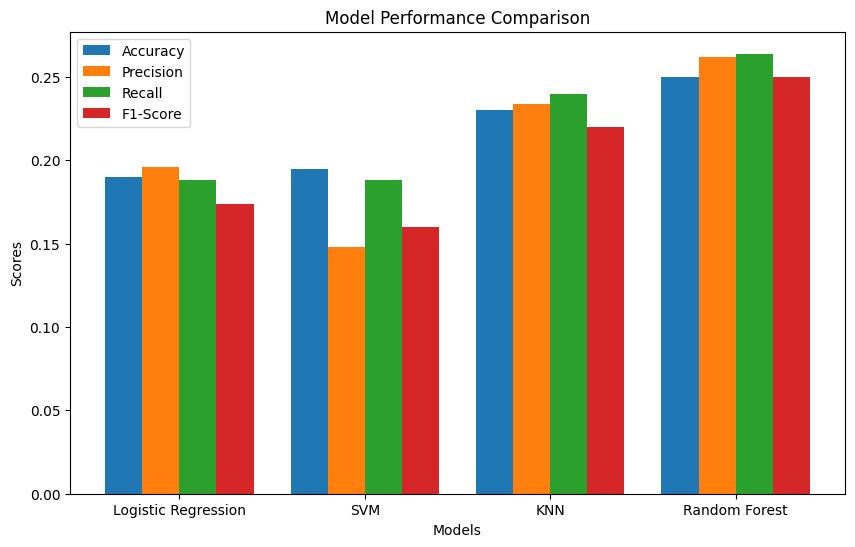

In [ ]:
models = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest']
accuracy = [ 0.19, 0.195, 0.23, 0.25]  # Example values
precision = [0.196, 0.148, 0.234, 0.262]
recall = [0.188, 0.188, 0.24, 0.264]
f1_score = [0.174, 0.16, 0.22, 0.25]

# Plotting the metrics
x = np.arange(len(models))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
ax.bar(x - width/2, precision, width, label='Precision')
ax.bar(x + width/2, recall, width, label='Recall')
ax.bar(x + width*1.5, f1_score, width, label='F1-Score')

# Add labels, title, and customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.show()

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print("Random Forest Model Accuracy:", accuracy)
print("Random Forest Model F1 Score:", f1)
print("Random Forest Model Classification Report:\n", report)

TypeError: 'list' object is not callable

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.33375
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.39      0.35       279
           1       0.40      0.07      0.11       258
           2       0.33      0.54      0.41       263

    accuracy                           0.33       800
   macro avg       0.35      0.33      0.29       800
weighted avg       0.35      0.33      0.30       800



In [ ]:
# SVM
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.32625
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.41      0.36       279
           1       0.30      0.17      0.22       258
           2       0.34      0.39      0.36       263

    accuracy                           0.33       800
   macro avg       0.32      0.32      0.32       800
weighted avg       0.32      0.33      0.32       800



In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)


y_pred_knn = knn_clf.predict(X_test)


print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.36375
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.48      0.42       279
           1       0.34      0.31      0.32       258
           2       0.37      0.29      0.33       263

    accuracy                           0.36       800
   macro avg       0.36      0.36      0.36       800
weighted avg       0.36      0.36      0.36       800



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset with outliers removed (from the previous step)
df = pd.read_csv('/content/cleaned_food_adulteration_data.csv')  # or use 'filtered_no_outliers_zscore.csv'

# Display the first few rows to ensure data is loaded correctly
print(df.head())

# Define features (X) and target (y)
x = df[['product_name', 'brand', 'adulterant']]
y = df['severity']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(x_train_pca, y_train)

# Predict the target values for the test set
y_pred = dt_model.predict(x_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print("Decision Tree Model Accuracy:", accuracy)
print("Decision Tree Model F1 Score:", f1)
print("Decision Tree Model Classification Report:\n", report)


   adulteration_id product_name   brand   category             adulterant  \
0              1.0       Butter  BrandB       Meat  Artificial sweeteners   
1              2.0      Chicken  BrandC      Dairy        Coloring agents   
2              3.0       Yogurt  BrandC       Meat  Artificial sweeteners   
3              4.0         Wine  BrandB  Beverages        Coloring agents   
4              5.0        Bread  BrandD      Dairy                  Water   

  detection_date          detection_method  severity health_risk  \
0      5/11/2024  Microbiological Analysis  Moderate         Low   
1      5/23/2024        Sensory Evaluation    Severe      Medium   
2      2/17/2024        Sensory Evaluation    Severe        High   
3      5/16/2024              Spectroscopy     Minor      Medium   
4       6/6/2024         Chemical Analysis    Severe      Medium   

             action_taken  
0          Product Recall  
1          Warning Issued  
2  Investigation Launched  
3          Produ

NameError: name 'x_train_pca' is not defined